In [1]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pairs = set([])
tau_vals = np.logspace(-1,3,10,base=10.0)
mLLP_vals = [100,200,300,400,450,500,550,600,650,
             700,800,900,1000,1100,1200,1300,1400,1500,
             1600,1800,2000,2200,2400,2600,2800,3000]
for mLLP, tau in itertools.product(mLLP_vals,tau_vals):
    tau = float('%1.2f' %tau)
    mLLP = int(mLLP)
    pairs.add((mLLP,tau))
pairs = sorted(list(pairs))
print(len(pairs))

260


In [3]:
print(pairs)

[(100, 0.1), (100, 0.28), (100, 0.77), (100, 2.15), (100, 5.99), (100, 16.68), (100, 46.42), (100, 129.15), (100, 359.38), (100, 1000.0), (200, 0.1), (200, 0.28), (200, 0.77), (200, 2.15), (200, 5.99), (200, 16.68), (200, 46.42), (200, 129.15), (200, 359.38), (200, 1000.0), (300, 0.1), (300, 0.28), (300, 0.77), (300, 2.15), (300, 5.99), (300, 16.68), (300, 46.42), (300, 129.15), (300, 359.38), (300, 1000.0), (400, 0.1), (400, 0.28), (400, 0.77), (400, 2.15), (400, 5.99), (400, 16.68), (400, 46.42), (400, 129.15), (400, 359.38), (400, 1000.0), (450, 0.1), (450, 0.28), (450, 0.77), (450, 2.15), (450, 5.99), (450, 16.68), (450, 46.42), (450, 129.15), (450, 359.38), (450, 1000.0), (500, 0.1), (500, 0.28), (500, 0.77), (500, 2.15), (500, 5.99), (500, 16.68), (500, 46.42), (500, 129.15), (500, 359.38), (500, 1000.0), (550, 0.1), (550, 0.28), (550, 0.77), (550, 2.15), (550, 5.99), (550, 16.68), (550, 46.42), (550, 129.15), (550, 359.38), (550, 1000.0), (600, 0.1), (600, 0.28), (600, 0.77), (6

In [4]:
pairsStable = sorted(list(zip([int(m) for m in mLLP_vals],['inf']*len(mLLP_vals))))
print(pairsStable)

[(100, 'inf'), (178, 'inf'), (257, 'inf'), (336, 'inf'), (415, 'inf'), (494, 'inf'), (573, 'inf'), (652, 'inf'), (731, 'inf'), (810, 'inf'), (889, 'inf'), (968, 'inf'), (1047, 'inf'), (1126, 'inf'), (1205, 'inf'), (1284, 'inf'), (1363, 'inf'), (1442, 'inf'), (1521, 'inf'), (1600, 'inf')]


In [5]:
df = pd.read_pickle('../scanResults_Wino.pcl')

In [6]:
slope, intercept, r, p, se = stats.linregress(df['mLLP'], np.log10(df['Total xsec (pb)']*139.0*1e3*5))

In [7]:
print(intercept,slope)

6.349713209722852 -0.00318029082663901


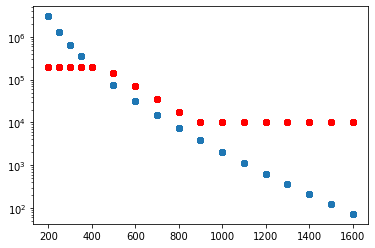

In [8]:
@np.vectorize
def nevts(m):      
    nLog = intercept + slope*m
    n = 10**nLog
    n = 2*min(100000,max(5000,10**(6.35 -0.003*m)))
    return n
    
plt.scatter(df['mLLP'],df['Total xsec (pb)']*139.0*1e3*10)
plt.scatter(df['mLLP'],nevts(df['mLLP']),c='red')
plt.yscale('log')
# plt.xscale('log')
plt.show()

In [9]:
df[['mLLP','Total xsec (pb)']]

,mLLP,Total xsec (pb)
0,200.0,2.195715
1,200.0,2.195715
2,250.0,0.953167
3,250.0,0.953167
4,200.0,2.195715
...,...,...
153,1600.0,0.000052
154,1600.0,0.000052
155,1600.0,0.000052
156,1600.0,0.000052
